In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
sns.set()

                              basementsqft  bathroomcnt  bedroomcnt  \
basementsqft                      1.000000     0.399533    0.351213   
bathroomcnt                       0.399533     1.000000    0.701141   
bedroomcnt                        0.351213     0.701141    1.000000   
calculatedfinishedsquarefeet      0.335733     0.351715    0.261357   
finishedsquarefeet50              0.290904     0.440840    0.396399   
fireplacecnt                      0.376304     0.406927    0.182945   
garagecarcnt                      0.331923     0.501805    0.423267   
poolsizesum                       0.371913     0.206404    0.129982   
numberofstories                   0.125164     0.303127    0.143470   
taxamount                         0.459114     0.312825    0.147094   

                              calculatedfinishedsquarefeet  \
basementsqft                                      0.335733   
bathroomcnt                                       0.351715   
bedroomcnt                      

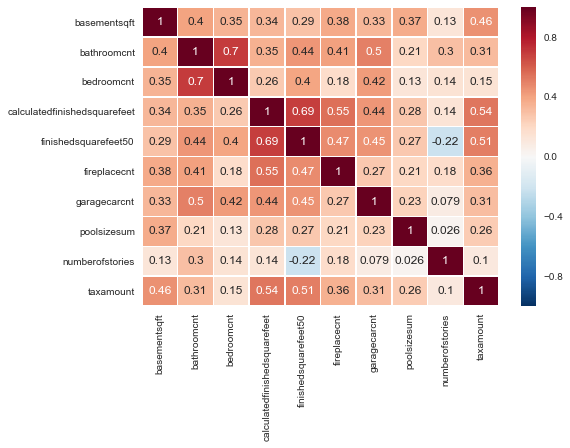

In [15]:
A = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[3,4,5,11,15,18,20,28,48,54])
pearsonc = A.corr(method='pearson')
print(pearsonc)
sns.heatmap(pearsonc, annot=True, linewidths=.5)
plt.show()


The pearson correlation is found between several fields from properties_201.csv. The most correlated pair is bedroomcnt and bathroomcnt with correlation value of 0.7. The least correlated or highest negative correlation is between numberofstories and finishedsquarefeet50 with a value of -0.2.

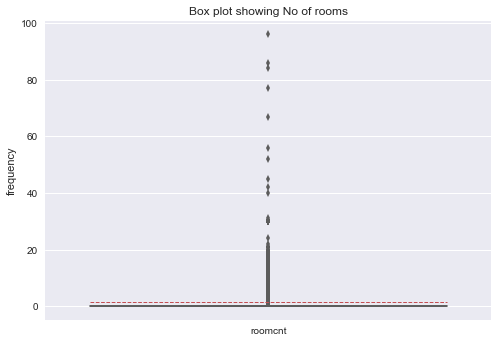

In [2]:
NoRoom = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[40])
sns.boxplot(data = NoRoom.loc[:,], showbox=True, showmeans=True, meanline=True)
plt.title("Box plot showing No of rooms")
plt.ylabel('frequency')
plt.show()

The Boxplot above shows the room count of the houses in the dataset and most of the houses have less than 20 rooms with mean of 3.

   logerror
0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
('Mean of', logerror    0.011457
dtype: float64)


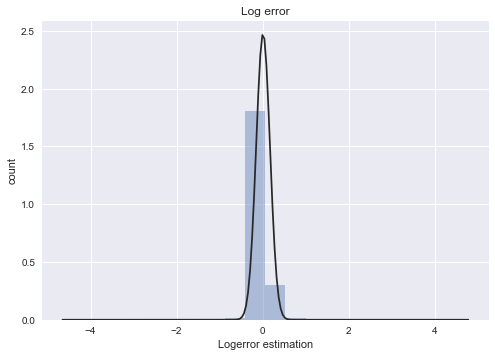

In [65]:
"""
distplot showing errorLog frequency
"""
from scipy.stats import norm
logError = pd.read_csv("D:\DSF\hw2\copytrain.csv", usecols=[1])
print(logError.head())
df=pd.DataFrame()
df=logError
print('Mean of', df.mean())
sns.distplot(logError, bins=20, kde=False, fit=norm)
plt.grid(True)
plt.title("Log error")
plt.ylabel('count')
plt.xlabel('Logerror estimation')
plt.show()

A distplot is drawn to estimate the log error. From the graph it is seen that the most of the records have log error very close to zero with mean close to zero and the graph plotted is a normalised curve with mean of 0.11.

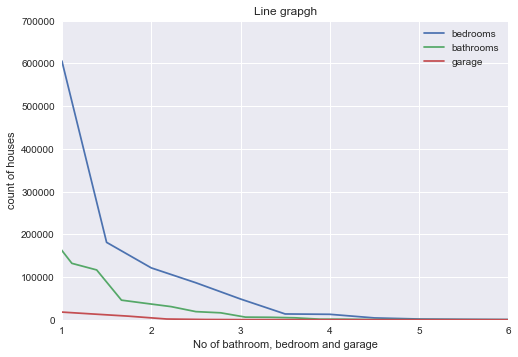

In [4]:
"""
distplot showing bathroom, bedroom and garage count
"""
Bathcnt = pd.DataFrame()
Bedcnt = pd.DataFrame()
garagecnt = pd.DataFrame()

Bathcnt['count'] = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[4])
Bedcnt['count'] = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[5])
garagecnt['count'] = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[20])
bath = Bathcnt['count'].value_counts(dropna=True)
bed = Bedcnt['count'].value_counts(dropna=True)
garage = garagecnt['count'].value_counts(dropna=True)
N1 = len(bed)
x1 = np.linspace(0,10, N1)
N2 = len(bath)
x2 = np.linspace(0,10, N2)
N3 = len(garage)
x3 = np.linspace(0,10, N3)
plt.plot(x1, bed, label='bedrooms')
plt.plot(x2, bath, label='bathrooms')
plt.plot(x3, garage, label='garage')
plt.grid(True)
plt.xlim([1,6])
plt.ylim([0,700000])
plt.legend(shadow=True)
plt.title("Line graph")
plt.ylabel('count of houses')
plt.xlabel('No of bathroom, bedroom and garage')
plt.show()

Line plot above shows the number of houses having bathroom, bedroom and garage count in the range 1-6. It is seen from the graph that most of the houses have single bedroom, bathroom and garage. Around 600000 houses have single bedrooms and around 150000 houses have one bathroom. Not many houses have more than 4 bedrooms, 3 bathrooms and 2 garages.

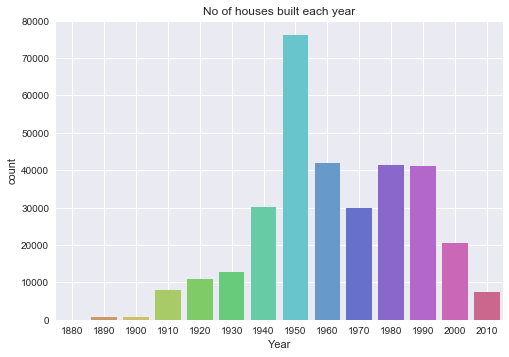

In [14]:
"""
Graph showing the number of houses built during each year from 1880 to 2010
"""
F = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[47])
F.columns=['yearbuilt']
sns.countplot(x='yearbuilt',data=F, palette='hls', order=[1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010])
plt.grid(True)
plt.title("No of houses built each year")
plt.ylabel('count')
plt.xlabel('Year')
plt.show()

The graph above shows the number of houses build during each year. It can be learnt from the grapgh that more houses were built during 1950 - 1990.

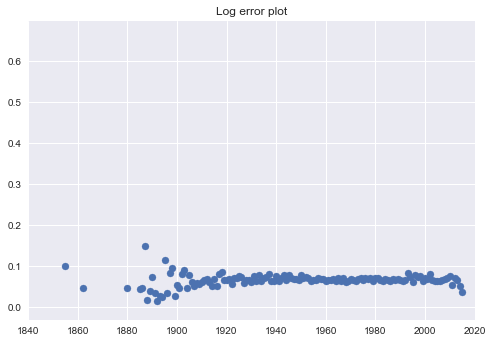

In [66]:
"""
Scatterplot between the year the house was built and the log error
"""
ds1 = pd.read_csv("D:\DSF\hw2\copytrain.csv", usecols=[1])
ds2 = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[47])
x1 = ds2.yearbuilt.value_counts()
df1 = pd.DataFrame({'yearbuilt':x1.index, 'count':x1.values})
x2 = abs(ds1['logerror']).groupby(ds2['yearbuilt']).mean()
df2 = pd.DataFrame({'yearbuilt':x2.index, 'logerrorDeviation':x2.values})
df = pd.merge(df1, df2, on='yearbuilt', how='inner')
df.sort_values('yearbuilt', inplace=True)

plt.scatter(df.yearbuilt,df.logerrorDeviation)
plt.title("Log error plot")
plt.xlim(1840,2020)
plt.show()

The scatterplot above shows that log error is higher during early years of 1840 - 1900. The error log was high during early 1840-1900. Since then it has almost remained constant till 2000 and seemed to have reduced during recent years.

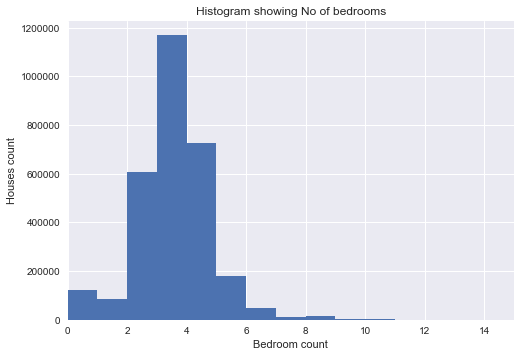

In [49]:
"""The histogram showing the bathroom count is a normalised curve"""
data = pd.read_csv('D:\DSF\hw2\properties_2016.csv', usecols=[5])
data.hist(bins=20)
plt.title("Histogram showing No of bedrooms")

plt.xlabel("Bedroom count")
plt.ylabel("Houses count")
plt.xlim([0,15])
plt.show()

The histogram above showing the bathroom count is clearly a normalised curve. It ranges from 0 to 11 with mean around 3 and standard deviation 11. Most of the houses around 1200000 have 3 bedrooms.

   taxamount
0        NaN
1        NaN
2   20800.37
3   14557.57
4    5725.17


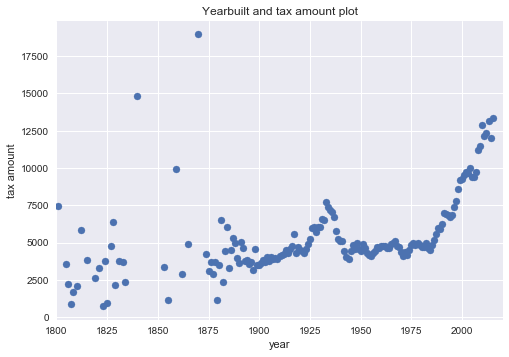

In [24]:
"""
Scatterplot between the year the house was built and the tax amount paid
"""
ds1 = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[54])
ds2 = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[47])
print ds1.head()

x1 = ds2.yearbuilt.value_counts()
df1 = pd.DataFrame({'yearbuilt':x1.index, 'count':x1.values})
x2 = abs(ds1['taxamount']).groupby(ds2['yearbuilt']).mean()
df2 = pd.DataFrame({'yearbuilt':x2.index, 'taxamount':x2.values})
df = pd.merge(df1, df2, on='yearbuilt', how='inner')
df.sort_values('yearbuilt', inplace=True)

plt.scatter(df.yearbuilt,df.taxamount)
plt.title("Yearbuilt and tax amount plot")
plt.xlim(1800,2020)
plt.xlabel('year')
plt.ylabel('tax amount')
plt.show()



The observation made from the scatterplot above is that, the tax amount is high for the houses built in the recent years and are low for houses built during early years. So as year goes on, the tax amount increases increases for the newly built houses.

In [5]:
"""
Linear Regression model
"""
df1 = pd.read_csv("D:\DSF\hw2\copytrain.csv")
df2 = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[0,3,4,5,11,14,15,18,20,21,26,27,28,40,47,48,54], low_memory=False)


In [4]:
print(df2.head())

   parcelid  basementsqft  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  10754147           NaN          0.0         0.0                    NaN   
1  10759547           NaN          0.0         0.0                    NaN   
2  10843547           NaN          0.0         0.0                    NaN   
3  10859147           NaN          0.0         0.0                    7.0   
4  10879947           NaN          0.0         0.0                    NaN   

   calculatedfinishedsquarefeet  finishedsquarefeet15  finishedsquarefeet50  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                       73026.0               73026.0                   NaN   
3                        5068.0                5068.0                   NaN   
4                        1776.0                1776.0                   NaN   

   fireplacecnt  garagecarcnt  garagetotalsqft  lotsizesquaref

In [38]:
print(df2.isnull().sum())

print(df1.isnull().sum())

parcelid                              0
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
calculatedfinishedsquarefeet      55565
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
fireplacecnt                    2672580
garagecarcnt                    2101950
garagetotalsqft                 2101950
lotsizesquarefeet                276099
poolcnt                         2467683
poolsizesum                     2957257
roomcnt                           11475
yearbuilt                         59928
numberofstories                 2303148
taxamount                         31250
dtype: int64
parcelid           0
logerror           0
transactiondate    0
dtype: int64


In [6]:
dftotal = pd.merge(df1, df2, on='parcelid', how='inner')
y = dftotal.logerror
filename = 'y.csv'
y.to_csv(filename, index=False)

dftotal.drop('logerror', 1, inplace=True)
X = dftotal
X.drop('transactiondate', 1, inplace=True)
#Replace the nan values with mean values of each column
X.fillna(X.mean(), inplace=True)

filename = 'X.csv'
X.to_csv(filename, index=False)


In [42]:
print(X.isnull().sum())


parcelid                        0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
finishedsquarefeet15            0
fireplacecnt                    0
garagecarcnt                    0
garagetotalsqft                 0
lotsizesquarefeet               0
poolcnt                         0
poolsizesum                     0
numberofstories                 0
dtype: int64


In [7]:
#Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=4)
# Initialising a Linear Regression model
lrm = linear_model.LinearRegression()
#Fitting the training data over the regression model
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Predicting the testing data set
prediction = lrm.predict(X_test)

In [8]:
#Printing the R^2 and RMSE
print("Score from testing dataset:", lrm.score(X_test, y_test))
print("Score from entire dataset:", lrm.score(X,y))
print("R^2:", r2_score(y_test,prediction))
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("Mean squared error", mean_squared_error(y_test, prediction))
print("Root mean squared error: {}".format(rmse))
print("Mean absolute error:", mean_absolute_error(y_test,prediction))

('Score from testing dataset:', 0.0028941919325681242)
('Score from entire dataset:', 0.0028923231715940467)
('R^2:', 0.0028941919325681242)
('Mean squared error', 0.026170181646693987)
Root mean squared error: 0.161772005139
('Mean absolute error:', 0.068139537692958302)


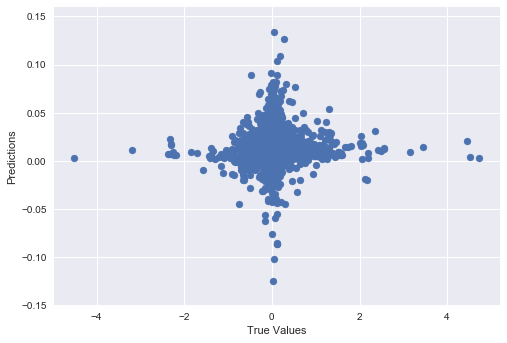

In [9]:
#Plotting a scatter plot on the actual values and the predicted values
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

A Simple Linear regression model is build on the data. The continuouse data from the dataset is picked and taken for testing and training. The entire dataset is divided into X and Y, the target variable which is furthur divided for testing and training. These training data are fitted into the regression model and prediction is made on the testing data. Then the deviation is found between the actual data and the predicted values and the R^2 value and Root Mean Square Error value is found. A scatter plot is drawn based on the same from which the predicted values and actual values are closer to zero with very minimal deviation.

In [21]:
"""
Decision tree regression model
"""
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

X = pd.read_csv("D:\DSF\hw2\X.csv")
y = pd.read_csv("D:\DSF\hw2\y.csv")
#Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

dtc = DecisionTreeRegressor(max_depth=5)
#Fitting the training data over the regression model
dtc.fit(X_train, y_train)
# Make predictions on the test set using the fit model.
y_pred = dtc.predict(X_test)

In [22]:
"""
Quantifying the accuracy of the prediction
"""
print("Accuracy score is", accuracy_score(y_test.astype(int),y_pred.astype(int))*100)
print("Mean absolute error is ", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean absolute error:", mean_absolute_error(y_test,y_pred))

('Accuracy score is', 99.601225861241375)
('Mean absolute error is ', 0.068397424361504228)
('R^2 is', -0.01000158608958257)
('Mean squared error', 0.02515646551211333)
Root Mean Squared Error: 0.158607898644
('Mean absolute error:', 0.068397424361504228)


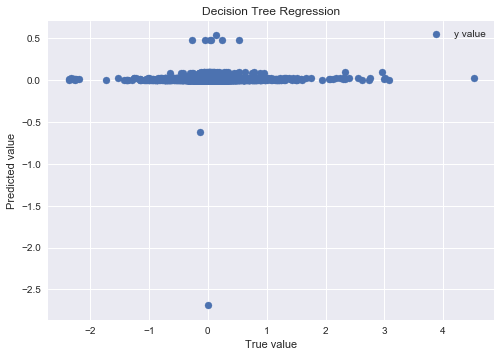

In [23]:
plt.scatter(y_test, y_pred, label="y value")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [24]:
tree.export_graphviz(dtc, out_file='tree.dot',filled=True, rounded=True) 

The decision tree algorithm is a supervised learning method that can be used for Classification and Regression problems. Decision tree regression model is used to predict the value of the target which the log error here by learning decision rules from the known data. Scatter plot is drawn showing the actual target value and the predicted values.

In [25]:
"""
K Nearest Neighbor model
"""
X = pd.read_csv("D:\DSF\hw2\X.csv")
y = pd.read_csv("D:\DSF\hw2\y.csv")
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [26]:
# Initialise the knn model.
# Choose the closest neighbors.
knn = KNeighborsRegressor(n_neighbors=55)
#Fitting the training data over the regression model
knn.fit(X_train, y_train)
# Make predictions on the test set using the fit model.
y_pred = knn.predict(X_test)

In [28]:
# evaluate accuracy
print("Accuracy score is", accuracy_score(y_test.astype(int), y_pred.astype(int))*100)
print("Mean absolute error is ", mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean absolute error:", mean_absolute_error(y_test,y_pred))

('Accuracy score is', 99.671041589741876)
('Mean absolute error is ', 0.071259356608615765)
('R^2 is', -0.0052001646767572129)
('Mean squared error', 0.026391671751130233)
Root Mean Squared Error: 0.162455137657
('Mean absolute error:', 0.071259356608615765)


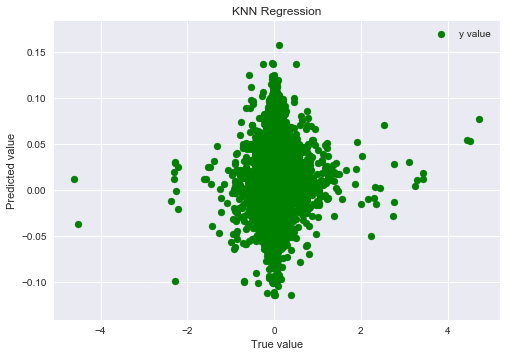

In [29]:
"""
Scatter plot showing the True values of the target and the predicted values
"""
plt.scatter(y_test, y_pred, label="y value", color='green')
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("KNN Regression")
plt.legend()
plt.show()

The k-nearest neighbors method predicts unknown values by matching them with the most similar known values. The entire dataset is divided for training and testing. The train dataset is made to be fitted on KNN regression model and the target value is predicted. A scatter plot is drawn on the actual values and the predicted values.

In [31]:
"""
Random forest regression
"""
X = pd.read_csv("D:\DSF\hw2\X.csv")
y = pd.read_csv("D:\DSF\hw2\y.csv")
#Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split( X,y.logerror, test_size=0.33, random_state=42)
rfr= RandomForestRegressor(n_estimators = 100,min_samples_split=2,max_depth=10, n_jobs=-1)
#Fitting the training data over the regression model
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [32]:
y_pred = rfr.predict(X_test)
"""
Quantifying the accuracy of the prediction
"""
print("Accuracy score is", accuracy_score(y_test.astype(int), y_pred.astype(int))*100)
print("Mean absolute error is ", mean_absolute_error(y_test, y_pred))
print("Mean squared error", mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean absolute error:", mean_absolute_error(y_test,y_pred))

('Accuracy score is', 99.667684871269842)
('Mean absolute error is ', 0.068558018566511947)
('R^2 is', -0.0025577248076507075)
('Mean squared error', 0.026322294120586384)
Root Mean Squared Error: 0.16224146856
('Mean absolute error:', 0.068558018566511947)


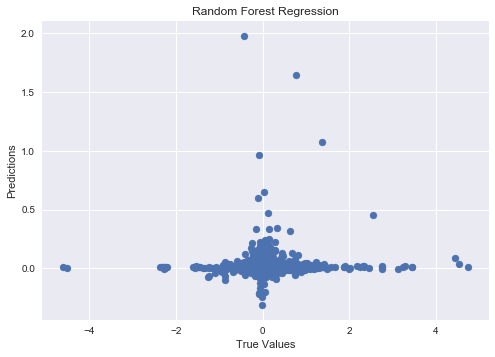

In [33]:
"""
Scatter plot showing the True values of the target and the predicted values
"""
plt.scatter(y_test, y_pred)
plt.title("Random Forest Regression")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

Random Forest Regression method is used above to predict the value of the target variable. Random Forest algorithm can be used for both classification and regression problems. Random forest van handle the missing values and when we have more trees, it does not overfit the model. The dataset is divided for training and testing and the predicted value of the target is compared with the true values and graph is plotted.

In [2]:
#For Kaggle submission
df2 = pd.read_csv("D:\DSF\hw2\properties_2016.csv", usecols=[0,3,4,5,11,14,15,18,20,21,26,27,28,40,47,48,54], low_memory=False)
df2 = fillna(df2.mean(), inplace=True)
filename = 'cleanX.csv'
df2.to_csv(filename, index=False)

In [2]:
df1 = pd.read_csv("D:\DSF\hw2\copytrain.csv")
df2 = pd.read_csv("D:\DSF\hw2\cleanX.csv")

In [3]:
dftotal = pd.merge(df1, df2, on='parcelid', how='inner')
y = dftotal.logerror
dftotal.drop('logerror', 1, inplace=True)
X = dftotal.drop('transactiondate', 1)

In [7]:
#Splitting the dataset for training and testing
X_train = X
y_train = y
X_test = df2
# Initialising a Linear Regression model
reg= RandomForestRegressor(n_estimators = 100,min_samples_split=2,max_depth=10, n_jobs=-1)
#Fitting the training data over the regression model
reg.fit(X_train,y_train)
# Predicting the target value
prediction = reg.predict(X_test)


In [8]:
#Populating the sample_submission.csv file
prediction = np.asarray(prediction)
df = pd.read_csv("D:\DSF\hw2\sample_submission.csv")
dfz = pd.DataFrame(df)
dfz['201610'] = prediction
dfz['201611'] = prediction
dfz['201612'] = prediction
dfz['201710'] = prediction
dfz['201711'] = prediction
dfz['201712'] = prediction

print(dfz.head())

   ParcelId   201610   201611   201612   201710   201711   201712
0  10754147  0.01760  0.01760  0.01760  0.01760  0.01760  0.01760
1  10759547  0.00302  0.00302  0.00302  0.00302  0.00302  0.00302
2  10843547 -0.03446 -0.03446 -0.03446 -0.03446 -0.03446 -0.03446
3  10859147  0.03022  0.03022  0.03022  0.03022  0.03022  0.03022
4  10879947 -0.07360 -0.07360 -0.07360 -0.07360 -0.07360 -0.07360


In [9]:
dfz.to_csv('riddhi_rfr_submisssion.csv', index=False, float_format='%.4f')

Random Forest Regression is used above for predicting the logerror and the predicted values are copied into a .csv file for uploading to Kaggle contest. Using Random Forest Regression, score of 0.065 is achieved with the rank of 2198.
While using Linear Regression model, score of 0.0650306 is got with the rank of 2197 in the Kaggle site. When using KNN regression model, score of 0.081 is got with the rank of 2227.

Report on my favorite model: 

Introduction:
K Nearest Neighbor algorithm can be used for classification and regression problems.
KNN regression usually calculates the average of the target variable of K nearest neighbors. It can also work by calculating the inverse distance weighted average of the K nearest neighbors. It can be Manhattan or Euclidean distance for continuouse and Hamming distance for catagorical values. The input is the K nearest features in the feature space and the output is the average of those values for KNN regression. In case of KNN classification, majority vote of its K nearest neighbors.

Working mechanism:
Choosing the value of K will have effect on the classifier. The best K corresponds to the lowest test error rate. The K value can be selected via many heuristics. Large value of K will reduce the effect of noise on making prediction but blur the boundaries between classes. Larger the values of K, smoother the boundary between the classes. Small values of K can lead to high variance. 

Like any other algorithm,k-NN algorithm can be affected by the presence of noise or irrelevant data. So it is better to remove the less revelent data and keep only those features which will contribute towards making prediction. This can be achieved by removing columns which contain more Nan value or Null value or redundant columns can be removed. This will bring down the size of the dataset as well. This is also called as Dimenstion reduction. 

Processing the raw data to get a definite set of features is called feature extraction. Feature extraction is usually done before applying k-NN algorithm. Both these steps can be combined as part of principal component analysis (PCA), linear discriminant analysis (LDA), or canonical correlation analysis (CCA).

In k-fold cross validation, the training set is divided into k groups of almost equal size. Initially one group is used for training or fiting and the remaining k−1 groups are used for testing or predicting. This process is repeated k times with different group as training set each time and observations are recorded each time and then the average is taken as the final result.

The entire dataset can be divided into 2 parts for testing and training. The training data is made to be fit on the model and the target variable is predicted with the testing dataset. A confusion matrix is often used as metric to validate the accuracy of kNN classifier. Other metrics include Mean squared error, Mean absolute error and Root Mean Square Error.

Advantages of KNN model:
    Can be used on both Continuous and Catagorical data.
    Simple to implement.
    Flexibility in choosing the value of K.
    One of the fastest algorithm.
    Efficient with large training dataset.
    Performs easily with multiclass data sets as well.

Disadvantages of KNN model:
    Choosing K value can alter the results.
    Usage of different distance metric can create deviation in the result.
    Computation cost is high since distance has to be measured for each query with each of the entities in the feature space.
    Even though it has a fast testing phase, the training phase can be longer with k-fold cross validation.

Accuracy Evaluation:
KNN regressor is used above to fit the data and evaluation results are listed below.
'Accuracy score is', 99.671041589741876
'Mean squared error', 0.026391671751130233
Root Mean Squared Error: 0.162455137657
'Mean absolute error:', 0.071259356608615765
Score from Kaggle: 0.0816
Rank in Kaggle: 2227

Conclusion: 
Working of KNN algorithm, how it is applied in classification and regression setting, its pros and cons were discussed. Out of decision tree regression, Logistic regression, Random forest regression, KNN regression performed better.